<a href="https://www.kaggle.com/code/mesutssmn/sentiment-analysis-for-mental-health?scriptVersionId=188878887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #f909; font-size: 150%; text-align: left;">

<h3 align="center"><font color='#30000' size=120%>Sentiment Analysis for Mental Health</font></h3>

    
<h4 align="left"><font color='#30000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for classification</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN
    
    

<h3 align="left"><font color='#300000' size=5%>ABOUT DATA:</font></h3>

This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.
   
    
<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://cdn.wordart.com/static/img/home/jm4lph3v1zl1_e74af2da666de95c0e834ac0e9f1296b.webp" alt="Sentiment" width="900"></div>
    
<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://cdn.prod.website-files.com/614c82ed388d53640613982e/64f7989c55786e5b4de9b9cb_sentiment-analysis-explained.webp" alt="Sentiment" width="900"></div>
</div>

   ##### Thank you for taking the time to read. Please don't ignore voting.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTS </div>


In [1]:
import pandas as pd
import numpy as np
import string

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
2024-07-18 22:57:39.485673: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 22:57:39.485919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 22:57:39.647914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv('/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURES </div>


<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #8553; color: #333; padding: 20px;">
    
<h1 style="color: #2c3e50;">Data Overview</h1>
    <p>The dataset integrates information from the following Kaggle datasets:</p>
    <ul>
        <li>3k Conversations Dataset for Chatbot</li>
        <li>Depression Reddit Cleaned</li>
        <li>Human Stress Prediction</li>
        <li>Predicting Anxiety in Mental Health Data</li>
        <li>Mental Health Dataset Bipolar</li>
        <li>Reddit Mental Health Data</li>
        <li>Students Anxiety and Depression Dataset</li>
        <li>Suicidal Mental Health Dataset</li>
        <li>Suicidal Tweet Detection Dataset</li>
    </ul>

<h2 style="color: #2c3e50;">Target Overview</h2>
    <p>The dataset consists of statements tagged with one of the following seven mental health statuses:</p>
    <ul>
        <li>Normal</li>
        <li>Depression</li>
        <li>Suicidal</li>
        <li>Anxiety</li>
        <li>Stress</li>
        <li>Bi-Polar</li>
        <li>Personality Disorder</li>
    </ul>

<h2 style="color: #2c3e50;">Data Collection</h2>
    <p>The data is sourced from diverse platforms including social media posts, Reddit posts, Twitter posts, and more. Each entry is tagged with a specific mental health status, making it an invaluable asset for:</p>
    <ul>
        <li>Developing intelligent mental health chatbots.</li>
        <li>Performing in-depth sentiment analysis.</li>
        <li>Research and studies related to mental health trends.</li>
    </ul>

<h2 style="color: #2c3e50;">Features</h2>
    <ul>
        <li><strong>unique_id:</strong> A unique identifier for each entry.</li>
        <li><strong>Statement:</strong> The textual data or post.</li>
        <li><strong>Mental Health Status:</strong> The tagged mental health status of the statement.</li>
    </ul>

<h2 style="color: #2c3e50;">Usage</h2>
    <p>This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data. It can be used in various applications such as:</p>
    <ul>
        <li>Chatbot development for mental health support.</li>
        <li>Sentiment analysis to gauge mental health trends.</li>
        <li>Academic research on mental health patterns.</li>
    </ul>

<h2 style="color: #2c3e50;">Acknowledgments</h2>
    <p>This dataset was created by aggregating and cleaning data from various publicly available datasets on Kaggle. Special thanks to the original dataset creators for their contributions.</p>
</div>


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION </div>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA ANALYSIS  </div>


In [4]:
df['statement'] = df['statement'].fillna('')

In [5]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [7]:
df["status"].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [8]:
df[df["status"] == "Anxiety"]["statement"][1]

'trouble sleeping, confused mind, restless heart. All out of tune'

In [9]:
df["status"] = df["status"].map({'Anxiety':0, 'Normal':1, 'Depression':2, 'Suicidal':3, 'Stress':4, "Bipolar": 5, "Personality disorder": 6})

In [10]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    text = text.str.replace(r'[^\w\s]', '', regex = True)
    text = text.str.replace("\n" , '', regex = True)
    text = text.str.replace('\d', '', regex = True)
    text = text.str.replace(r'\[.*?\]', '', regex = True)
    text = text.str.replace(r'https?://\S+|www\.\S+', '', regex = True)
    text = text.str.replace(r'<.*?>+', '', regex = True)
    text = text.str.replace(r'\w*\d\w*', '', regex = True)
    return text

In [11]:
df["statement"] = clean_text(df["statement"])

In [12]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

In [13]:
df["statement"] = remove_stopwords(df["statement"])

In [14]:
delete = pd.Series(' '.join(df['statement']).split()).value_counts()[-1000:]
df['statement'] = df['statement'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

In [15]:
nlp = spacy.load('en_core_web_sm')

def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc])

In [16]:
df['statement'] = df['statement'].apply(lemmatize_sentence)

In [17]:
df.head()

,statement,status
0,oh gosh,0
1,trouble sleep confused mind restless heart tune,0
2,wrong back dear forward doubt stay restless re...,0
3,I ve shift focus something else I m still worried,0
4,I m restless restless month boy mean,0


In [18]:
df.isnull().sum()

statement    0
status       0
dtype: int64

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> HOLD-OUT </div>


In [19]:
y = df['status']
X = df.drop('status', axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train

,statement
32560,get
22775,come awful start lose year relationship family...
44021,need inspiration hit kitchen tonight
20262,possible communicate text suicidal feel like s...
13631,literally get call wierd internet friend group...
...,...
11284,use confident cheerful person today become awk...
44732,spanx except miss last week lee go iplayer
38158,tl dr abuse mentally physically parent through...
860,sell tutorial


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> WORD CLOUD </div>


In [22]:
def plot_wordcloud(text, title=None, save_path=None):
    wordcloud = WordCloud(width=800, height=400, colormap = 'BuPu_r',
                          background_color='white', 
                          contour_width=3, contour_color='black').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    plt.show()

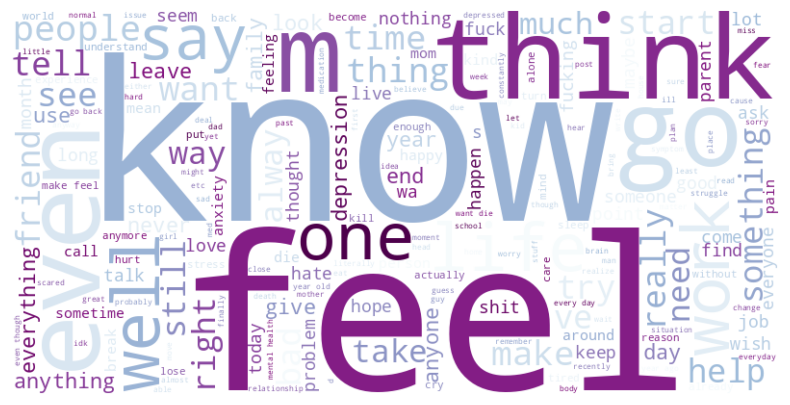

In [23]:
all_text = ' '.join(X_train['statement'])
plot_wordcloud(all_text)

In [24]:
y.unique().tolist()

[0, 1, 2, 3, 4, 5, 6]

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>


## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML FUNCTIONS </div>


In [25]:
def count_vec_boost(model, text_col, max_df, max_features, ngram_range, n_estimators, max_depth=3, learning_rate=0.03, verbose = False):
    """
    Vectorizes text data using CountVectorizer, trains a classifier model, and evaluates its performance.

    Parameters:
    - model: Classifier model (e.g., XGBoostClassifier, LightGBMClassifier, CatBoostClassifier)
    - text_col: Name of the text column in the dataset
    - max_df: Maximum document frequency threshold for CountVectorizer
    - max_features: Maximum number of features for CountVectorizer
    - ngram_range: Tuple specifying the range of n-grams (e.g., (1, 2) for unigrams and bigrams)
    - stop_words: List of stop words to be removed during vectorization
    - n_estimators: Number of estimators for the classifier model
    - max_depth: Maximum depth of the decision trees (if applicable)
    - learning_rate: Learning rate for gradient boosting classifiers (if applicable)

    Returns:
    - None

    Prints:
    - Classification report showing precision, recall, and F1-score for each class.
    - Confusion matrix visualizing predicted vs. true labels.

    Example usage:
    ```
    vec_pred(RandomForestClassifier, 'text_column', max_df=0.8, max_features=1000, ngram_range=(1, 2),
             stop_words=['english'], n_estimators=100, max_depth=10)
    ```

    """
    best_vectorizer = CountVectorizer(max_df=max_df, max_features=max_features, ngram_range=ngram_range)
    X_train_vector = best_vectorizer.fit_transform(X_train[text_col])
    best_classifier = model(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    best_classifier.fit(X_train_vector, y_train)
    X_test_vector = best_vectorizer.transform(X_test[text_col])
    y_pred = best_classifier.predict(X_test_vector)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    class_labels = y.unique().tolist()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [26]:
def tfidf_vec_boost(model, text_col, max_df, max_features, ngram_range, n_estimators, max_depth=3, learning_rate=0.03, verbose = False):
    """
    Vectorizes text data using TfidfVectorizer, trains a classifier model, and evaluates its performance.

    Parameters:
    - model: Classifier model (e.g., XGBoostClassifier, LightGBMClassifier, CatBoostClassifier)
    - text_col: Name of the text column in the dataset
    - max_df: Maximum document frequency threshold for TfidfVectorizer
    - max_features: Maximum number of features for TfidfVectorizer
    - ngram_range: Tuple specifying the range of n-grams (e.g., (1, 2) for unigrams and bigrams)
    - stop_words: List of stop words to be removed during vectorization
    - n_estimators: Number of estimators for the classifier model
    - max_depth: Maximum depth of the decision trees (if applicable)
    - learning_rate: Learning rate for gradient boosting classifiers (if applicable)

    Returns:
    - None

    Prints:
    - Classification report showing precision, recall, and F1-score for each class.
    - Confusion matrix visualizing predicted vs. true labels.

    Example usage:
    ```
    vec_boost_tfidf(RandomForestClassifier, 'text_column', max_df=0.8, max_features=1000, ngram_range=(1, 2),
                    stop_words=['english'], n_estimators=100, max_depth=10)
    ```
    """
    # Vectorize text data using TfidfVectorizer
    best_vectorizer = TfidfVectorizer(max_df=max_df, max_features=max_features, ngram_range=ngram_range)
    X_train_vector = best_vectorizer.fit_transform(X_train[text_col])
    
    # Initialize and train the classifier model
    best_classifier = model(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, verbose = verbose)
    best_classifier.fit(X_train_vector, y_train)
    
    # Transform test data using the trained vectorizer
    X_test_vector = best_vectorizer.transform(X_test[text_col])
    
    # Predict test labels
    y_pred = best_classifier.predict(X_test_vector)
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_labels = y_test.unique().tolist()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [27]:
def pipe_boosting(vectorizer, classifier, X_grid, y_grid):    
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])

    hyperparameters = {
        'vectorizer__ngram_range': [(1, 3)],
        'vectorizer__max_df': [1.0],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]}

    grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_grid, y_grid)

    print("Best hyperparameters:", grid_search.best_params_)

In [28]:
def predict_new_text(text, c_vectorizer, model):
    """
    Predicts the category of a given text using the trained vectorizer and model.

    Parameters:
    - text: The input text to be classified
    - c_vectorizer: The trained CountVectorizer or TfidfVectorizer
    - model: The trained classification model

    Returns:
    - dict: The predicted category label and its corresponding index
    """
    # Define the mapping of indices to category labels
    label_mapping = {
        0: 'Anxiety',
        1: 'Normal',
        2: 'Depression',
        3: 'Suicidal',
        4: 'Stress',
        5: 'Bipolar',
        6: 'Personality disorder'
    }

    # Transform the input text using the vectorizer
    text_vector = c_vectorizer.transform([text])
    
    # Predict the category index
    predicted_index = model.predict(text_vector)[0]
    
    # Map the predicted index to the category label
    predicted_label = label_mapping[predicted_index]
    
    return {predicted_label: predicted_index}

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> COUNTVECTORIZER </div>


In [29]:
"""%%time
pipe_boosting(vectorizer = CountVectorizer(),
classifier = XGBClassifier(verbose = -1),
X_grid = X_train['statement'],
y_grid = y_train)"""

"%%time\npipe_boosting(vectorizer = CountVectorizer(),\nclassifier = XGBClassifier(verbose = -1),\nX_grid = X_train['statement'],\ny_grid = y_train)"

In [30]:
best_hyperparameters = {'learning_rate': 0.07, 'n_estimators': 200, 'max_df': 1.0, 'max_features': 10000, 'ngram_range': (1, 3)}

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       966
           1       0.75      0.96      0.84      4154
           2       0.70      0.68      0.69      3860
           3       0.66      0.58      0.62      2572
           4       0.69      0.38      0.49       697
           5       0.87      0.65      0.75       711
           6       0.90      0.42      0.57       301

    accuracy                           0.72     13261
   macro avg       0.76      0.62      0.66     13261
weighted avg       0.72      0.72      0.71     13261



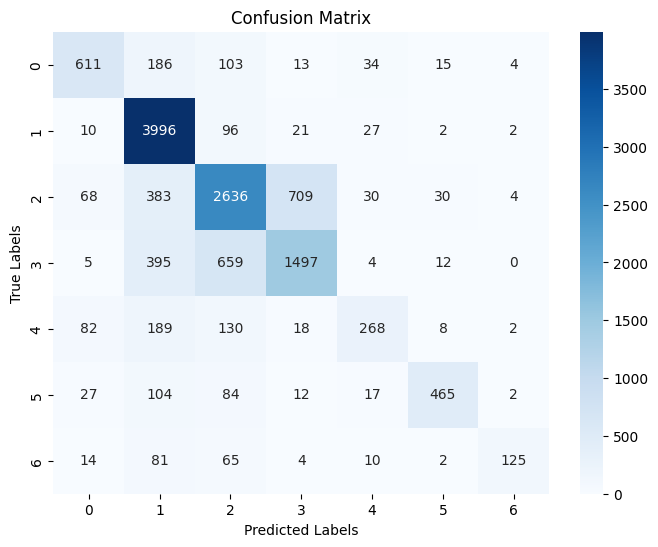

In [31]:
count_vec_boost(XGBClassifier, "statement", **best_hyperparameters, verbose = False)

In [32]:
c_vectorizer = CountVectorizer(max_df = 1.0, max_features = 2000, ngram_range = (1, 3))
X_train_vector = c_vectorizer.fit_transform(X_train['statement'])
X_test_vector = c_vectorizer.transform(X_test['statement'])

In [33]:
model = XGBClassifier(**best_hyperparameters)
model.fit(X_train_vector, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_df=1.0,
              max_features=10000, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=200, n_jobs=None, ...)

In [34]:
text = df["statement"].sample(1)
text_index = text.index
print(text.index)
text = text.values[0]
text

Index([44239], dtype='int64')


'xambix wow welcome home eh well shit especially come back holiday fuck people'

In [35]:
predict_new_text(text,c_vectorizer, model)

{'Normal': 1}

In [36]:
df.loc[text_index]["status"]

44239    1
Name: status, dtype: int64

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #f909; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> TFIDF-VECTORIZER </div>


              precision    recall  f1-score   support

           0       0.79      0.72      0.76       966
           1       0.80      0.95      0.87      4154
           2       0.71      0.71      0.71      3860
           3       0.66      0.62      0.64      2572
           4       0.67      0.47      0.56       697
           5       0.86      0.69      0.77       711
           6       0.86      0.45      0.59       301

    accuracy                           0.75     13261
   macro avg       0.77      0.66      0.70     13261
weighted avg       0.74      0.75      0.74     13261



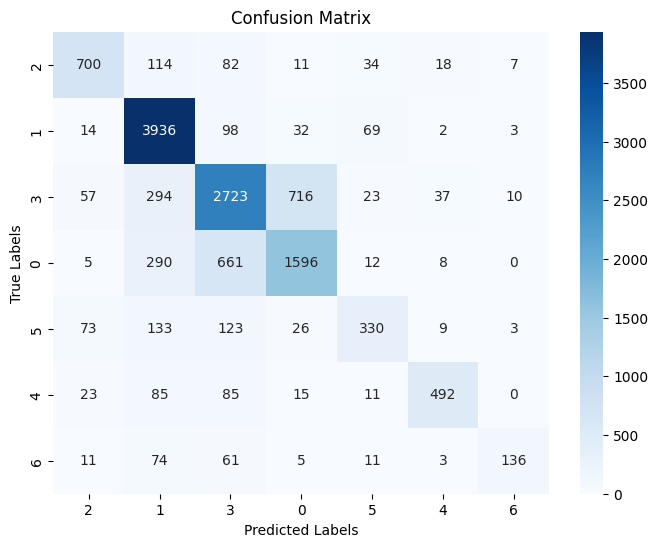

In [37]:
tfidf_vec_boost(XGBClassifier, "statement", 1.0, 2000, (1, 3), 200, 5, 0.07, verbose = False)

In [38]:
"""%%time
pipe_boosting(vectorizer = TfidfVectorizer(),
classifier = LGBMClassifier(force_col_wise=True, verbose = -1),
X_grid = X_train['statement'],
y_grid = y_train)"""

"%%time\npipe_boosting(vectorizer = TfidfVectorizer(),\nclassifier = LGBMClassifier(force_col_wise=True, verbose = -1),\nX_grid = X_train['statement'],\ny_grid = y_train)"

In [39]:
best_params = {'learning_rate': 0.06, 'n_estimators': 200, 'max_df': 1.0, 'max_features': 2000, 'ngram_range': (1, 3)}

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       966
           1       0.78      0.96      0.86      4154
           2       0.71      0.70      0.70      3860
           3       0.67      0.60      0.63      2572
           4       0.68      0.45      0.54       697
           5       0.85      0.67      0.75       711
           6       0.84      0.44      0.57       301

    accuracy                           0.74     13261
   macro avg       0.76      0.64      0.69     13261
weighted avg       0.74      0.74      0.73     13261



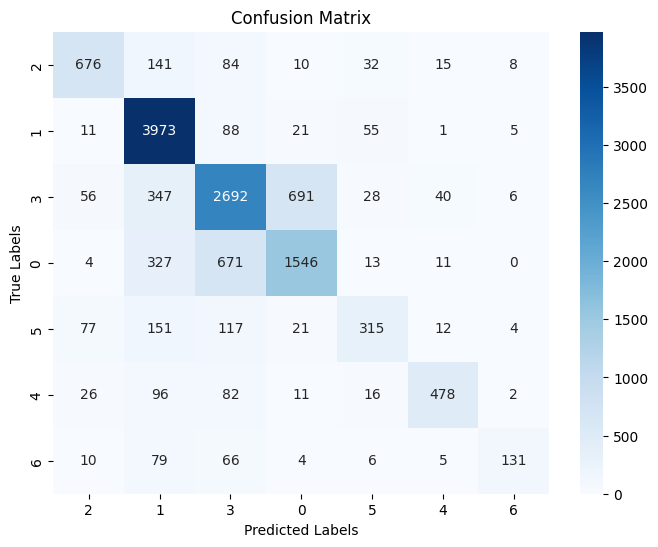

In [40]:
tfidf_vec_boost(LGBMClassifier, "statement", **best_params, verbose = -1)

In [41]:
model = XGBClassifier(**best_hyperparameters, verbose = False)
model.fit(X_train_vector, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_df=1.0,
              max_features=10000, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=200, n_jobs=None, ...)

In [42]:
"""text = df["statement"].sample(1)
text_index = text.index
print(text.index)
text = text.values[0]
text"""

'text = df["statement"].sample(1)\ntext_index = text.index\nprint(text.index)\ntext = text.values[0]\ntext'

In [43]:
predict_new_text(text, c_vectorizer, model)

{'Normal': 1}

In [44]:
df.loc[text_index]["status"]

44239    1
Name: status, dtype: int64